# Kütüphane

In [25]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pandas_datareader import data as pdr
!pip install yfinance
import yfinance as yf

# veri işleme

In [206]:
yf.pdr_override()

In [207]:
df = pdr.get_data_yahoo('THYAO.IS', data_source='yahoo', start='2010-10-01', end='2021-12-14')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-10-01,4.202898,4.311594,4.094202,4.202898,4.133933,14443941
2010-10-04,4.275362,4.311594,4.130434,4.275362,4.205207,7132942
2010-10-05,4.492753,4.528985,4.275362,4.492753,4.419031,21407429
2010-10-06,4.420289,4.565217,4.347826,4.420289,4.347756,14610120
2010-10-07,4.347826,4.420289,4.275362,4.347826,4.276483,13850056


In [208]:
df.shape

(2893, 6)

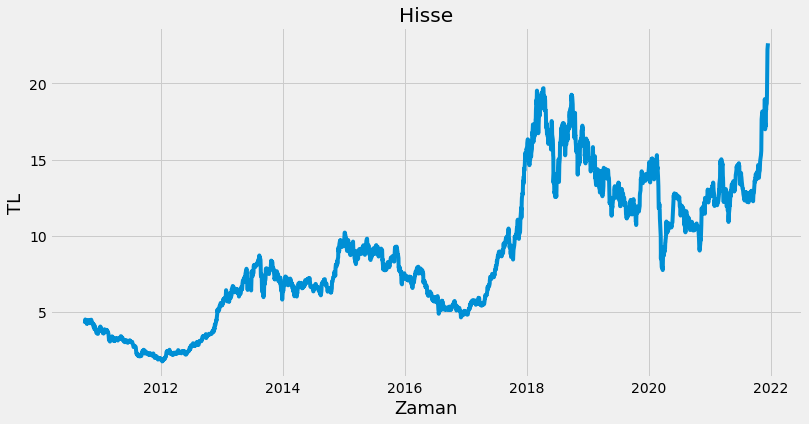

In [209]:
plt.figure(figsize=(12,6))
plt.title('Hisse')
plt.plot(df['Close'])
plt.xlabel('Zaman', fontsize=18)
plt.ylabel('TL', fontsize=18)
plt.show()

# LSTM DEMO

In [210]:
#Create a new dataframe with only the Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

2315

In [211]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.11787873],
       [0.12134577],
       [0.13174682],
       ...,
       [0.96937929],
       [0.98086206],
       [1.        ]])

In [212]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()


[array([0.11787873, 0.12134577, 0.13174682, 0.12827978, 0.1248128 ,
       0.1248128 , 0.12827978, 0.1300133 , 0.1248128 , 0.11787873,
       0.11961225, 0.11961225, 0.11961225, 0.12307928, 0.12307928,
       0.12654627, 0.12827978, 0.1300133 , 0.12307928, 0.12307928,
       0.12134577, 0.11995893, 0.12203918, 0.12966662, 0.12758641,
       0.12827978, 0.1310534 , 0.12827978, 0.12827978, 0.12065235,
       0.12273255, 0.11787873, 0.10886447, 0.10955788, 0.11649195,
       0.11163808, 0.10123703, 0.10609085, 0.10886447, 0.11094471,
       0.10401065, 0.10123703, 0.09915683, 0.09846342, 0.0936096 ,
       0.09014257, 0.09222277, 0.09846342, 0.09499638, 0.09222277,
       0.08667553, 0.08667553, 0.09083598, 0.09777   , 0.09915683,
       0.09846342, 0.09915683, 0.10054362, 0.10331723, 0.10539744])]
[0.10401064968071491]

[array([0.11787873, 0.12134577, 0.13174682, 0.12827978, 0.1248128 ,
       0.1248128 , 0.12827978, 0.1300133 , 0.1248128 , 0.11787873,
       0.11961225, 0.11961225, 0.11

In [213]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [214]:
x_train.shape

(2255, 60)

In [215]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [216]:
# Build the LSTM model
model =Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [217]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [218]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2255/2255 [==============================] - 47s 19ms/step - loss: 0.0013


In [219]:
#Create the testing data set
#Create a new array containing scaled values from index 954 to 2000
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test=[]
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [220]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [221]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [222]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [223]:
#Get the root mean squared error
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.17550341150752402

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


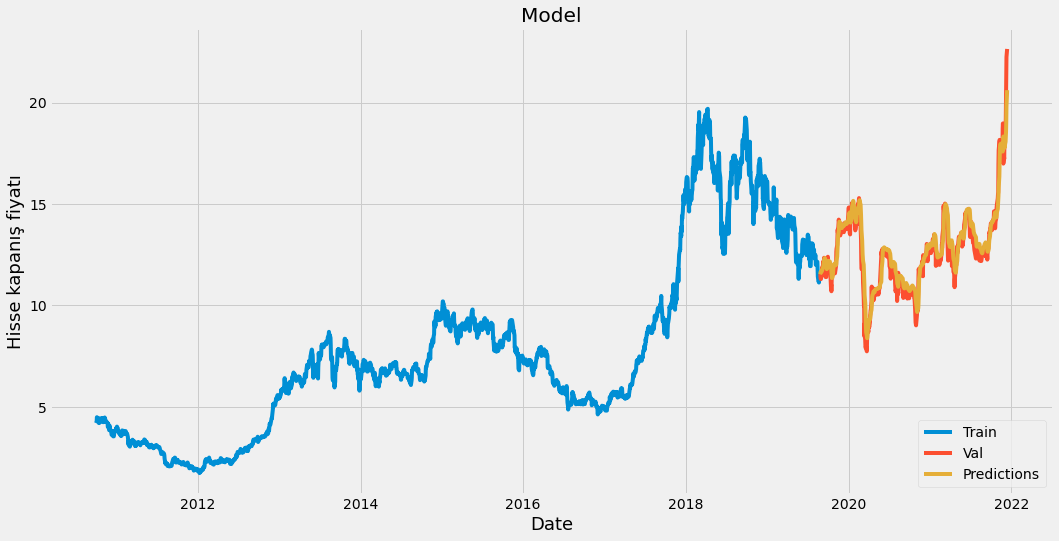

In [224]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']= predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Hisse kapanış fiyatı', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [225]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-08-26,11.580000,11.532302
2019-08-27,11.560000,11.564369
2019-08-28,11.350000,11.630062
2019-08-29,11.300000,11.665287
2019-08-30,11.300000,11.672329
...,...,...
2021-12-07,19.200001,18.275261
2021-12-08,20.379999,18.553001
2021-12-09,22.000000,19.032124


In [226]:
#Get the quote
stock_quote = pdr.get_data_yahoo('THYAO.IS', data_source='yahoo', start='2010-10-30', end='2021-12-14')
#Create a new dataframe
new_df = stock_quote.filter(['Close'])
#Get the last 60 day closing price values and convert dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[21.33377]]


In [227]:
#Get the quote
stock_quote2 = pdr.get_data_yahoo('THYAO.IS', data_source='yahoo', start='2021-12-14', end='2021-12-14')
print(stock_quote2['Close'])

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- THYAO.IS: No data found for this date range, symbol may be delisted
Series([], Name: Close, dtype: float64)
